In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from ydata_profiling import ProfileReport
import json

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sampling the data from the dataset ( Since it is too large)

In [2]:
import json
import csv
import random

In [5]:
def sample_and_convert_to_csv(json_file, csv_file, sample_size):
    # Open the JSON file and load the data
    sampled_data = []
    with open(json_file, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                sampled_data.append(data)
            except json.JSONDecodeError:
                print("Error: Invalid JSON format in line:", line)

    # Randomly sample the data
    sampled_data = random.sample(sampled_data, min(sample_size, len(sampled_data)))

    # Open the CSV file in write mode
    with open(csv_file, 'w', newline='') as f:
        # Create a CSV writer object
        writer = csv.writer(f)

        # Write the header row based on the keys of the first JSON object
        if sampled_data:
            writer.writerow(sampled_data[0].keys())

        # Write the sampled data rows
        for item in sampled_data:
            writer.writerow(item.values())


In [6]:
json_file = '/content/drive/MyDrive/Video_Games.jsonl'
csv_file = 'sampled_output.csv'
sample_size = 250  # Deciding sample size
sample_and_convert_to_csv(json_file, csv_file, sample_size)

Working with the CSV file

In [25]:
fp = '/content/sampled_output.csv'

In [76]:
df = pd.read_csv(fp)

In [77]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,awesome,Excellent collection to have for all the dmc f...,[],B005VBVQDI,B006UBEV4O,AFTNS2VWV2YWITGFH7DKOFPVOIFA,1356545880000,0,False
1,5.0,Nice gaming mouse for big hands,Got it because of the extensions. I don't use...,[],B096VBF7QH,B096VBF7QH,AF25P5L44LU2SS7O2JWKZU4BFPMA,1641529725693,0,True
2,2.0,There are better RPGs out there...,Too much fanservice and the story is not that ...,[],B00BJH11FQ,B00BJH11FQ,AFAEMZXVRZGYTPPZS6MTO3GCTFIA,1394204046000,2,True
3,3.0,Three Stars,Too small for regular use. Can only fit some t...,[],B072PW59TZ,B072V478NR,AGFXDKQJSWI7T7EYX7SBMLG2RRNQ,1528142272000,0,True
4,5.0,Great condition,Game works great and my six year old loves it.,[],B00844RD1I,B00844RD1I,AGGFMRARTR6Y5KUKWGGCNKTLJOHA,1587163534902,0,True


In [78]:
print("Col_Name: ", df.columns.tolist()) #Print column names to understand the dataframe

Col_Name:  ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


Determining the missing value in dataset

In [79]:
missing_values = df.isnull().sum() #Checking missing values in the dataframe
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


It is clear that the dataset doesnot have any null values. So it saves us from working on the strategy to proceed for the further analysis

Find the statistical values (Like mean, median, min, max, standard deviation)

In [80]:
stats = df.describe() #Describing the statistical results of the numerical variables in the dataset

print("Statistical values for numerical columns: ")
print(stats)

Statistical values for numerical columns: 
           rating     timestamp  helpful_vote
count  250.000000  2.500000e+02    250.000000
mean     3.932000  1.505415e+12      0.896000
std      1.531259  1.344103e+11      3.571021
min      1.000000  9.998918e+11      0.000000
25%      3.000000  1.430257e+12      0.000000
50%      5.000000  1.520568e+12      0.000000
75%      5.000000  1.613523e+12      0.750000
max      5.000000  1.689379e+12     40.000000


Sentiment Analysis

In [31]:
from textblob import TextBlob

In [81]:
def senti_analyse(text):
  #Using Textblob to analyse the overall sentiment analysis score for each review. It is the score combination of all words in the review
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  return sentiment

df['sentiment'] = df['text'].apply(senti_analyse)

In [82]:
print(df['sentiment'])

0      0.933333
1      0.433333
2      0.392000
3      0.030000
4      0.166667
         ...   
245    0.200000
246    0.700000
247   -0.050000
248    0.000142
249    0.428571
Name: sentiment, Length: 250, dtype: float64


Plotting Sentiment results vs rating

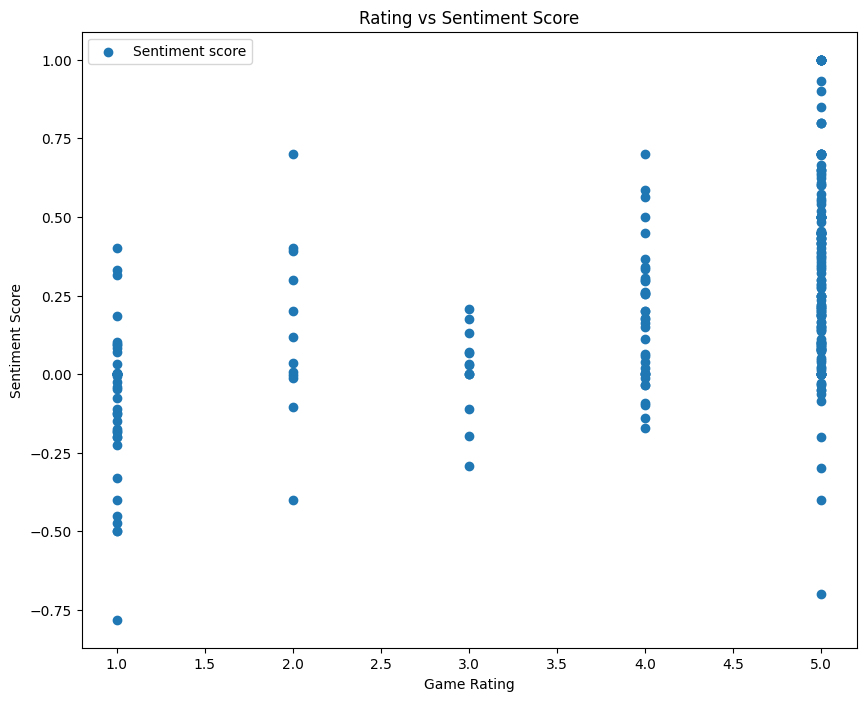

In [83]:
#Plotting the graph to understand distribution of sentiment scores within different rating categories
plt.figure(figsize =(10,8))
plt.scatter(df['rating'], df['sentiment'], marker = 'o', label = 'Sentiment score')

plt.xlabel('Game Rating')
plt.ylabel('Sentiment Score')
plt.title("Rating vs Sentiment Score")

plt.legend()

plt.grid(False)
plt.show()

In [89]:
# Create an interactive scatter plot using Plotly
fig = px.scatter(df1, x='Rating', y='Sentiment Score', title='Game Rating vs Sentiment Score',
             labels={'Sentiment Score': 'Sentiment Score'},
             color_discrete_sequence=['royalblue'])

# Show the plot
fig.show()

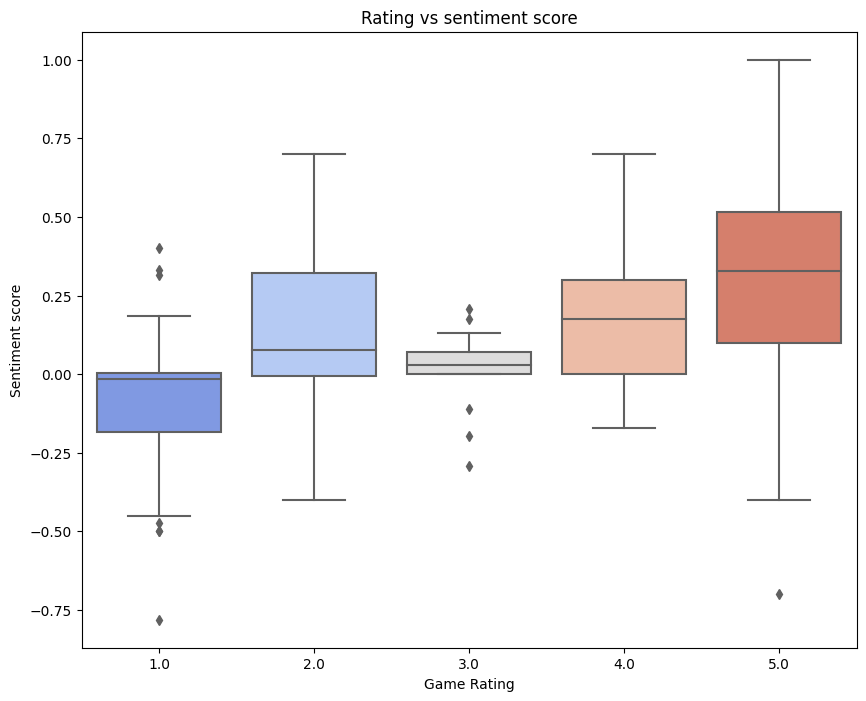

In [84]:
#Plotitng a box plot to understand distribution of sentiment scores within different rating categories

plt.figure(figsize=(10,8))
sns.boxplot(x='rating', y='sentiment', data=df, palette='coolwarm')
plt.xlabel('Game Rating')
plt.ylabel ('Sentiment score')
plt.title('Rating vs sentiment score')
plt.grid(False)
plt.show()

In [85]:
data = {'Rating': df['rating'], 'Sentiment Score': df['sentiment']}
df1 = pd.DataFrame(data)

In [124]:

# Create an interactive box plot using Plotly
fig = px.box(df1, x='Rating', y='Sentiment Score', title='Game Rating vs Sentiment Score',
             labels={'sentiment': 'Sentiment Score'},
             color_discrete_sequence=['red'])

# Show the plot
fig.show()

Temporal trends (Number of reviews over time)

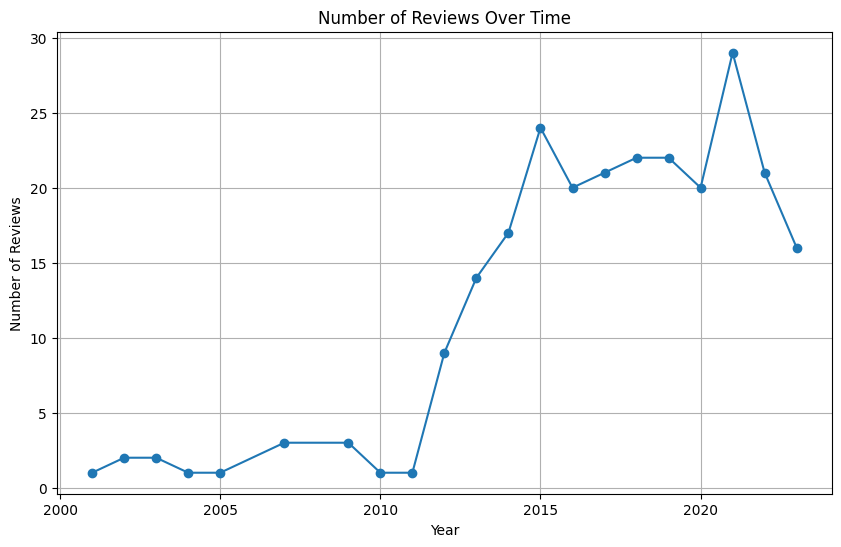

In [90]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Extract year and month from the timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# Plot the number of reviews over time
plt.figure(figsize=(10, 6))
df.groupby('year')['rating'].count().plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

Credibility assessment

In [99]:
#label encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])
df['text_encoded'] = label_encoder.fit_transform(df['text'])
df['verified_purchased_encoded'] = label_encoder.fit_transform(df['verified_purchase'])

In [107]:
#Assigning the independed variables and target variable

X = df[['rating', 'text_encoded', 'sentiment']]
y = df['verified_purchased_encoded']

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [110]:
y_pred = logit_model.predict(X_test)

In [126]:
print("The confusion matrix is \n", confusion_matrix(y_test, y_pred))

print("\nThe precision is ", precision_score(y_test, y_pred))

print("\nThe recall score is ", recall_score(y_test, y_pred))

print("\nThe F-1 score is ", f1_score(y_test, y_pred))

print("\nThe accuracy is ", accuracy_score(y_test, y_pred))


The confusion matrix is 
 [[ 0  3]
 [ 0 47]]

The precision is  0.94

The recall score is  1.0

The F-1 score is  0.9690721649484536

The accuracy is  0.94
